<a href="https://colab.research.google.com/github/codebuzer/Bioactivity-Prediction-App/blob/main/feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv("/content/drive/MyDrive/igib_project1/final_train_data.csv", index_col = 0)

In [75]:
df.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,batch_N,batch_O,batch_P,batch_Q,batch_R,batch_S,batch_T,batch_U,ctnum_median_status,infection
0,-0.330218,0.010943,-0.210595,0.042186,0.239706,-0.086893,-0.154712,0.084187,-0.214529,-0.107121,...,0,0,0,0,0,0,0,0,0,1
1,0.426675,0.201063,-0.024022,-0.013352,0.077604,0.044928,0.296684,-0.264555,-0.149196,0.093459,...,0,0,0,1,0,0,0,0,0,1


In [76]:
X = df.drop(['infection'], axis = 1)

In [77]:
y = df['infection']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: infection, dtype: int64

In [78]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,batch_M,batch_N,batch_O,batch_P,batch_Q,batch_R,batch_S,batch_T,batch_U,ctnum_median_status
0,-0.330218,0.010943,-0.210595,0.042186,0.239706,-0.086893,-0.154712,0.084187,-0.214529,-0.107121,...,0,0,0,0,0,0,0,0,0,0
1,0.426675,0.201063,-0.024022,-0.013352,0.077604,0.044928,0.296684,-0.264555,-0.149196,0.093459,...,0,0,0,0,1,0,0,0,0,0
2,-0.449942,-0.190835,0.044374,0.144829,-0.079280,-0.086654,-0.303872,-0.098651,0.259484,-0.207055,...,0,0,0,0,0,0,0,0,0,0
3,-0.385247,-0.206050,-0.239616,-0.120262,-0.137117,-0.310101,-0.280388,-0.231672,-0.151738,-0.266959,...,0,1,0,0,0,0,0,0,0,1
4,0.008941,-0.073164,-0.227340,-0.243443,-0.297489,-0.101534,0.102413,-0.061237,-0.281460,-0.125080,...,1,0,0,0,0,0,0,0,0,1


In [86]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0.0)
var_thres.fit(X)

VarianceThreshold()

In [87]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [88]:
X.columns[var_thres.get_support()]

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50',
       'agenum_random', 'ctnum_random', 'batch_A', 'batch_B', 'batch_C',
       'batch_D', 'batch_E', 'batch_F', 'batch_G', 'batch_H', 'batch_I',
       'batch_J', 'batch_K', 'batch_L', 'batch_M', 'batch_N', 'batch_O',
       'batch_P', 'batch_Q', 'batch_R', 'batch_S', 'batch_T', 'batch_U',
       'ctnum_median_status'],
      dtype='object')

In [89]:
constant_columns = [column for column in X.columns
                    if column not in X.columns[var_thres.get_support()]]

print(len(constant_columns))

0


In [90]:
for feature in constant_columns:
     print(feature)

In [91]:
X.drop(constant_columns,axis=1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,batch_M,batch_N,batch_O,batch_P,batch_Q,batch_R,batch_S,batch_T,batch_U,ctnum_median_status
0,-0.330218,0.010943,-0.210595,0.042186,0.239706,-0.086893,-0.154712,0.084187,-0.214529,-0.107121,...,0,0,0,0,0,0,0,0,0,0
1,0.426675,0.201063,-0.024022,-0.013352,0.077604,0.044928,0.296684,-0.264555,-0.149196,0.093459,...,0,0,0,0,1,0,0,0,0,0
2,-0.449942,-0.190835,0.044374,0.144829,-0.079280,-0.086654,-0.303872,-0.098651,0.259484,-0.207055,...,0,0,0,0,0,0,0,0,0,0
3,-0.385247,-0.206050,-0.239616,-0.120262,-0.137117,-0.310101,-0.280388,-0.231672,-0.151738,-0.266959,...,0,1,0,0,0,0,0,0,0,1
4,0.008941,-0.073164,-0.227340,-0.243443,-0.297489,-0.101534,0.102413,-0.061237,-0.281460,-0.125080,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,0.024144,-0.073323,-0.003174,-0.149865,-0.012262,-0.082948,-0.072346,0.105595,-0.213861,0.061094,...,0,0,0,0,0,0,0,0,0,1
648,-0.228229,0.120450,0.153928,0.086306,0.171875,0.247842,-0.353827,0.389145,-0.071815,0.080566,...,0,0,0,0,0,0,0,0,1,0
649,-0.158364,0.016343,0.013487,-0.192088,-0.118851,-0.110953,-0.253042,-0.056845,-0.152760,-0.191012,...,0,0,0,0,0,0,0,0,0,0
650,-0.228700,-0.007371,0.045645,-0.092429,0.119936,-0.078552,-0.331536,0.114182,-0.164232,-0.121419,...,0,0,0,0,0,0,0,0,0,0


In [92]:
X.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,batch_M,batch_N,batch_O,batch_P,batch_Q,batch_R,batch_S,batch_T,batch_U,ctnum_median_status
V1,1.000000,0.654727,0.329639,0.050631,0.136802,0.375539,0.755143,-0.072953,0.056632,0.672569,...,-0.025327,-0.025821,-0.016020,0.017061,0.094205,0.062307,0.035032,-0.003375,-0.034849,-0.105602
V2,0.654727,1.000000,0.682783,0.263866,0.501049,0.615724,0.316591,0.467913,0.180185,0.755177,...,-0.087910,-0.026118,-0.004068,0.015068,0.067718,-0.087413,0.203645,-0.028219,0.187733,-0.149747
V3,0.329639,0.682783,1.000000,0.237963,0.556071,0.530814,-0.024776,0.565780,0.057844,0.585765,...,-0.112071,-0.043191,-0.059431,-0.011810,0.000639,-0.122786,0.295499,-0.011138,0.194747,-0.181619
V4,0.050631,0.263866,0.237963,1.000000,0.150725,0.698320,0.123817,0.382577,0.733122,0.456785,...,-0.062799,0.098818,0.064396,0.090344,0.050411,-0.011862,0.067616,-0.113104,-0.015762,-0.015110
V5,0.136802,0.501049,0.556071,0.150725,1.000000,0.274995,-0.171989,0.638611,0.121595,0.407435,...,-0.115894,-0.019018,-0.024530,-0.049676,0.013456,-0.210328,0.371559,-0.019227,0.235747,-0.054087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
batch_R,0.062307,-0.087413,-0.122786,-0.011862,-0.210328,-0.042672,0.087741,-0.224453,-0.041683,-0.166275,...,-0.031868,-0.029269,-0.038709,-0.057120,-0.059369,1.000000,-0.055583,-0.024902,-0.060105,-0.067888
batch_S,0.035032,0.203645,0.295499,0.067616,0.371559,0.140543,-0.145497,0.351838,0.108608,0.196112,...,-0.035484,-0.032589,-0.043101,-0.063601,-0.066105,-0.055583,1.000000,-0.027727,-0.066924,-0.006044
batch_T,-0.003375,-0.028219,-0.011138,-0.113104,-0.019227,-0.128080,0.000516,0.045547,-0.092097,-0.013567,...,-0.015897,-0.014601,-0.019310,-0.028494,-0.029616,-0.024902,-0.027727,1.000000,-0.029983,-0.012303
batch_U,-0.034849,0.187733,0.194747,-0.015762,0.235747,0.086501,-0.193236,0.288013,-0.059852,0.106044,...,-0.038370,-0.035240,-0.046607,-0.068775,-0.071483,-0.060105,-0.066924,-0.029983,1.000000,0.036975


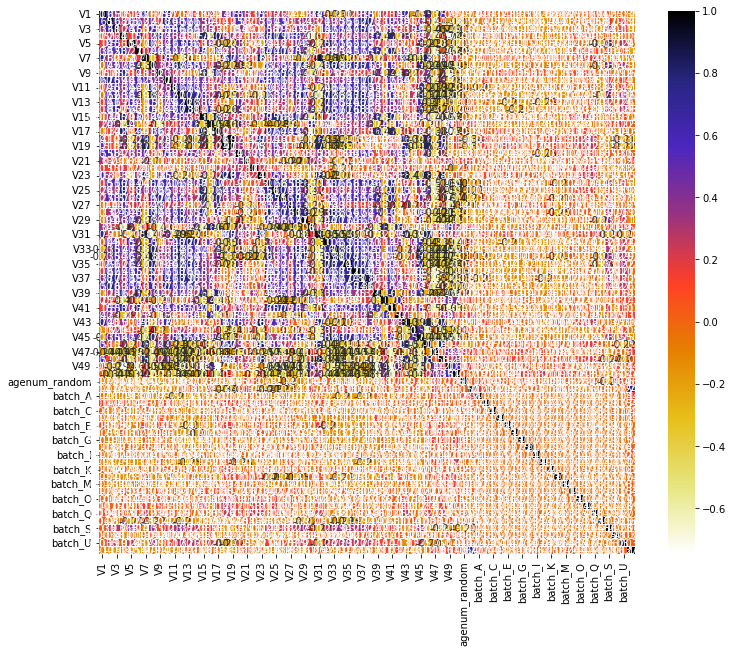

In [93]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [94]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [95]:
corr_features = correlation(X, 0.90)
len(set(corr_features))
4
corr_features

{'V19', 'V31'}

In [96]:
corr_features

{'V19', 'V31'}

In [97]:
X = X.drop(corr_features,axis=1)

In [98]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,batch_M,batch_N,batch_O,batch_P,batch_Q,batch_R,batch_S,batch_T,batch_U,ctnum_median_status
0,-0.330218,0.010943,-0.210595,0.042186,0.239706,-0.086893,-0.154712,0.084187,-0.214529,-0.107121,...,0,0,0,0,0,0,0,0,0,0
1,0.426675,0.201063,-0.024022,-0.013352,0.077604,0.044928,0.296684,-0.264555,-0.149196,0.093459,...,0,0,0,0,1,0,0,0,0,0
2,-0.449942,-0.190835,0.044374,0.144829,-0.079280,-0.086654,-0.303872,-0.098651,0.259484,-0.207055,...,0,0,0,0,0,0,0,0,0,0
3,-0.385247,-0.206050,-0.239616,-0.120262,-0.137117,-0.310101,-0.280388,-0.231672,-0.151738,-0.266959,...,0,1,0,0,0,0,0,0,0,1
4,0.008941,-0.073164,-0.227340,-0.243443,-0.297489,-0.101534,0.102413,-0.061237,-0.281460,-0.125080,...,1,0,0,0,0,0,0,0,0,1


In [99]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X, y)
mutual_info

array([0.04107977, 0.07216187, 0.1102226 , 0.06238302, 0.07401475,
       0.07393058, 0.09165647, 0.1121153 , 0.07399401, 0.07579154,
       0.08373271, 0.21566356, 0.10523476, 0.16334303, 0.06136219,
       0.13274988, 0.07047279, 0.28784289, 0.07802328, 0.04684362,
       0.13288276, 0.20619663, 0.07167624, 0.03991845, 0.04789344,
       0.065268  , 0.07653029, 0.02135439, 0.0349956 , 0.17828608,
       0.12385237, 0.14541095, 0.11780582, 0.13454041, 0.14057012,
       0.06976626, 0.05808202, 0.02385924, 0.08753436, 0.08555333,
       0.12287236, 0.09834772, 0.11626189, 0.11983843, 0.02295268,
       0.19617528, 0.02886279, 0.07626965, 0.27183054, 0.01907326,
       0.03869465, 0.01285155, 0.0119936 , 0.        , 0.02662974,
       0.03357427, 0.        , 0.03865896, 0.        , 0.03305299,
       0.00821483, 0.05132539, 0.01773403, 0.01889224, 0.01158414,
       0.06530749, 0.04809724, 0.00673624, 0.02747407, 0.        ,
       0.05080405, 0.        ])

In [100]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

V18                    0.287843
agenum_random          0.271831
V12                    0.215664
V23                    0.206197
V48                    0.196175
                         ...   
batch_D                0.000000
batch_I                0.000000
batch_T                0.000000
batch_G                0.000000
ctnum_median_status    0.000000
Length: 72, dtype: float64

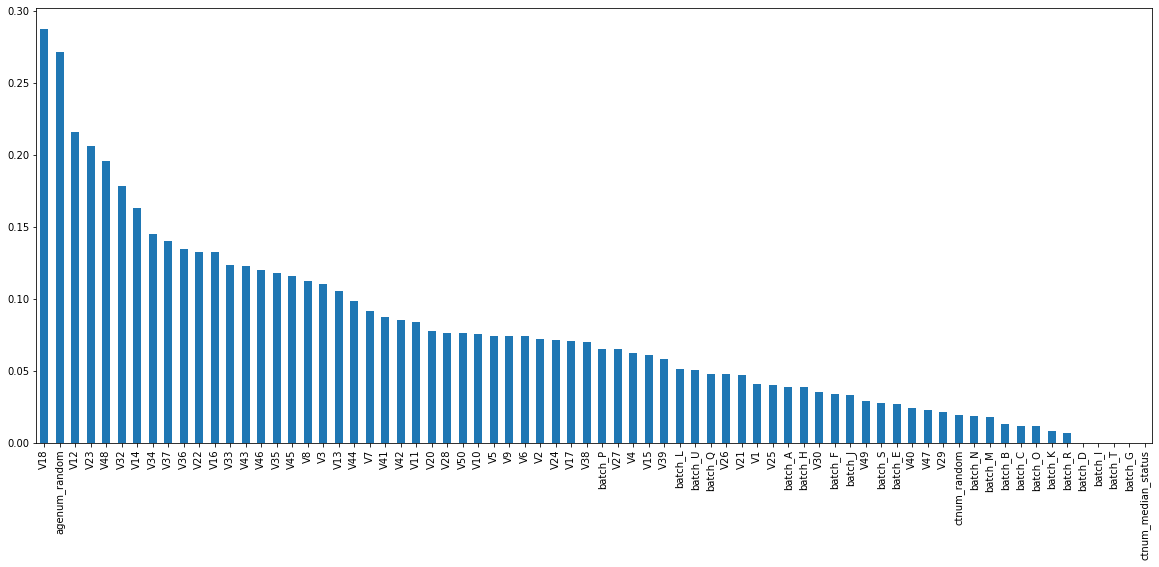

In [101]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [102]:
from sklearn.feature_selection import SelectKBest

In [120]:
#Now we Will select the best important features
sel_best_cols = SelectKBest(mutual_info_classif, k=64)
sel_best_cols.fit(X, y)
X.columns[sel_best_cols.get_support()]

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V32', 'V33',
       'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43',
       'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'agenum_random',
       'ctnum_random', 'batch_A', 'batch_B', 'batch_C', 'batch_D', 'batch_E',
       'batch_F', 'batch_G', 'batch_L', 'batch_M', 'batch_P', 'batch_Q',
       'batch_R', 'batch_S', 'batch_U'],
      dtype='object')

In [121]:
X = X.drop(['batch_D','batch_I','batch_T','batch_G'], axis = 1)

In [122]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,batch_L,batch_M,batch_N,batch_O,batch_P,batch_Q,batch_R,batch_S,batch_U,ctnum_median_status
0,-0.330218,0.010943,-0.210595,0.042186,0.239706,-0.086893,-0.154712,0.084187,-0.214529,-0.107121,...,1,0,0,0,0,0,0,0,0,0
1,0.426675,0.201063,-0.024022,-0.013352,0.077604,0.044928,0.296684,-0.264555,-0.149196,0.093459,...,0,0,0,0,0,1,0,0,0,0
2,-0.449942,-0.190835,0.044374,0.144829,-0.079280,-0.086654,-0.303872,-0.098651,0.259484,-0.207055,...,0,0,0,0,0,0,0,0,0,0
3,-0.385247,-0.206050,-0.239616,-0.120262,-0.137117,-0.310101,-0.280388,-0.231672,-0.151738,-0.266959,...,0,0,1,0,0,0,0,0,0,1
4,0.008941,-0.073164,-0.227340,-0.243443,-0.297489,-0.101534,0.102413,-0.061237,-0.281460,-0.125080,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
X = 